<a href="https://colab.research.google.com/github/kongenikhil/Kaggle_DataSet_Files/blob/master/HOM_chap_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition : 

Predict Housing Prices based on the California Housing Dataset 

# Dowloading Data 

In [38]:
# funtion to fetch the data 
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

Data Exploration and Preprocessing :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path = os.path.join(HOUSING_PATH,'housing.csv')
housing = pd.read_csv(file_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba4c985908>,
      dtype=object)

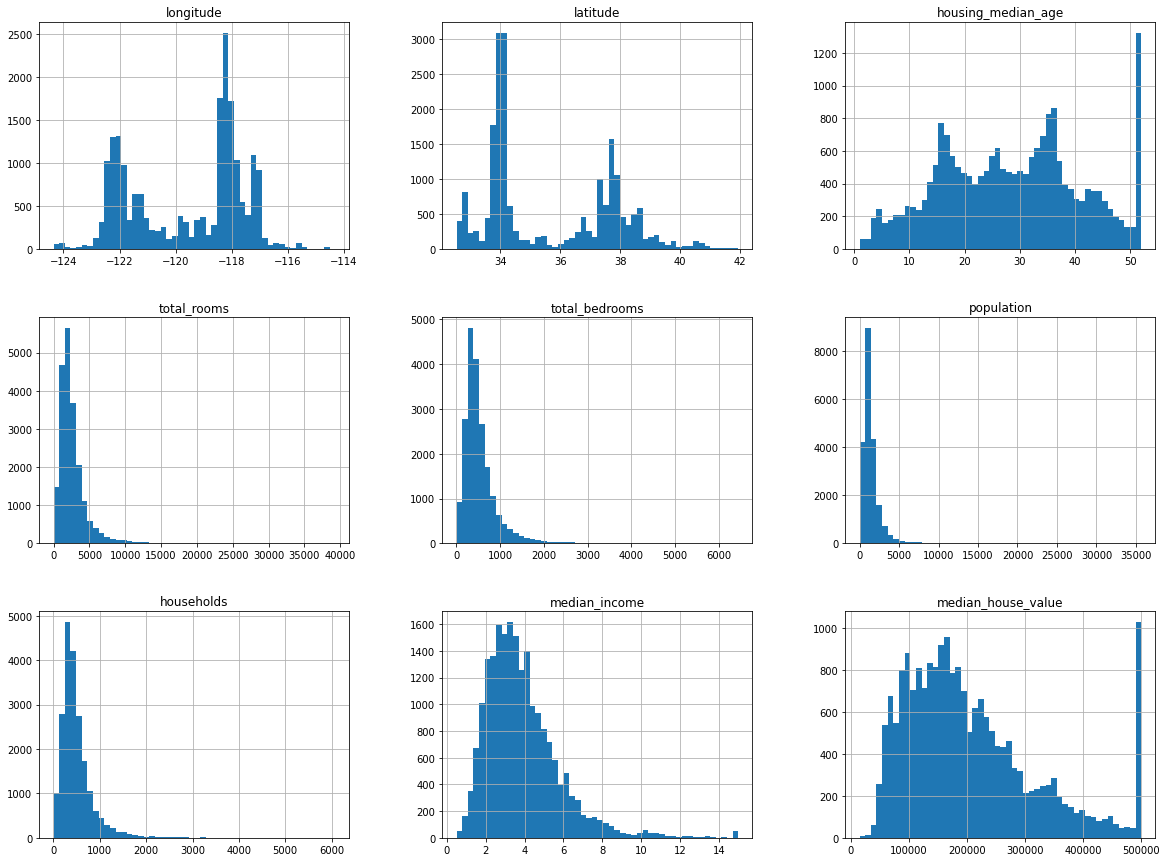

In [ ]:
housing.hist(bins=50,figsize=(20,15))

In [ ]:
# splitting the data-set
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)

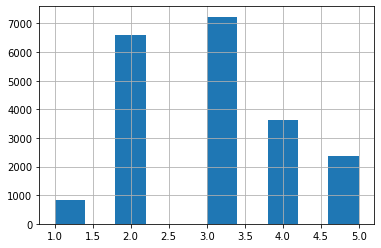

In [ ]:
# Categorizing the median income as important parameter , and can be analzed better by ccategorizing it 

housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5 , 5.0 , inplace=True)
housing['income_cat'].hist()

In [ ]:
# We use stratified sampling to get an balanced sample ( to avoid any sampling bias)
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']) :
  strat_train_set = housing.loc[train_index]
  strat_test_set  = housing.loc[test_index]

# strat_test_set, strat_train_set are the respective test ad train sets 

In [ ]:
housing['income_cat'].value_counts() / len(housing) * 100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64

In [ ]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set) * 100

3.0    35.059351
2.0    31.885901
4.0    17.629603
5.0    11.440165
1.0     3.984981
Name: income_cat, dtype: float64

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set) * 100

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64

In [ ]:
# Stratified  sampling are used to produce test and train data that are representative of the original dataset
# its basically balacing the test set 

In [ ]:
housing_train = strat_train_set.copy()

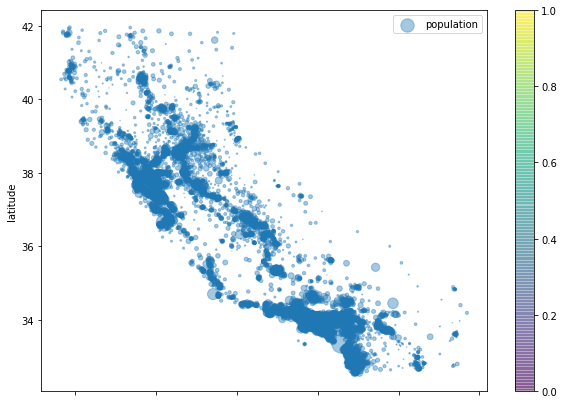

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',
             figsize=(10,7),
             cmap=plt.get_cmap('jet'),colorbar=True,)
# the alpha parameter gives us the plot density variation

In [ ]:
# Lets Check the correlation matrix 
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
# creating new columns based on inituition 
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room']   = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Note : Always write fuctions when cleaning data , as they can be reused multiple times in other projects or on new data 


In [ ]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_test_set['median_house_value'].copy()

In [ ]:
# Data Cleaning 1. Remove missing values 
# We can either drop the value or impute it , we drop the attribute of the missing values are too high 
# Here we impute it with median 

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy="median")

# Now  We impute he entire numerical data of the dataset with median 
housing_num = housing.drop('ocean_proximity',axis=1)
X = imputer.fit_transform(housing_num)

In [ ]:
# X is a numpy array 
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


In [ ]:
# Handling Text Data 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print('The mapping of data is  {}'.format(encoder.classes_))


[0 0 4 ... 1 0 3]
The mapping of data is  ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Label Encoder is suitable for mostly binary values , because for the ML algorithm the Label encoder denoted categories by integers 1,2,3,4,5 etc 
This give the ML algorithm an impression that the values at 1 & 5 are very different from 1 & 2 . This however is usually not the case.

To solve this we implement one hot encoding , where each type of categorical datum gets its values as one 

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# print('The output is a sparse matrix and NOT a numpy array {}'.format(housing_cat_1hot))
#  TO convert into one hot encoded array we can use 'to_array' function
print('One hot encoded array {}'.format(housing_cat_1hot.toarray()))

One hot encoded array [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
# Also a direct dummy array can be obtained by using LABELBINARIZER feature in sklearn 

## Custom Transformers 

In [ ]:
# creating my own transformers
from sklearn.base import BaseEstimator ,TransformerMixin
rooms_ix, bedrooms_ix , population_ix , household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin) :
  def __init__ (self,add_bedrooms_per_room = True) :
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self,X,y=None) :
    return self
  def transform(self,X,y=None) :
    rooms_per_household = X[:,rooms_ix] / X[:, household_ix]
    population_per_household = X[:,population_ix] / X[:,household_ix]
    if self.add_bedrooms_per_room :
      bed_rooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household
                   ,bed_rooms_per_room]
    else :
      return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values) 

In [ ]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 2.0, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 5.0, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 2.0, 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 3.0, 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 3.0, 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 3.0, 4.843505477308295,
        1.9859154929577465]], dtype=object)

# Data Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         
                         ('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler',StandardScaler()),
])

In [ ]:
hosing_num_tr = num_pipeline.fit_transform(housing_num)


In [ ]:
from sklearn.base import BaseEstimator , TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin) :
    def __init__ (self,attribute_names) :
      self.attribute_names = attribute_names
    def fit(self,X,y=None) :
      return self
    def transform(self,X) :
      return X[self.attribute_names].values


In [ ]:
from sklearn_pandas import DataFrameMapper

# For a categorical data- type 
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']
num_pipeline = Pipeline([
                         ('selector',DataFrameSelector(num_attributes)),
                         ('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler',StandardScaler()),
])
# pipeline for categorical datatypes
cat_pipeline = Pipeline([
                         ('selector',DataFrameSelector(cat_attributes)),
                         ('one_hot_encoder',OneHotEncoder(sparse=False))
])
# Joining the above two pipelines to form a single feauture ( i.e the output would contain both the outputs from both the pipelines)


In [ ]:
from sklearn.pipeline import FeatureUnion 
full_pipeline = FeatureUnion(transformer_list=[
                                               
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared